## The Sparks Foundation

## #GRIPJUN21

### Task-2 : Clustering using unsupervised ML

### Submitted by - Bhumika Nim

### Find the optimum number of clusters and represent them visually.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Data

In [2]:
# Loading entire dataset
iris = pd.read_csv('Iris.csv')

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Loading data for clustering
data = iris.drop(['Species','Id'], axis=1)

data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Loading target variables
target = iris['Species']

target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### Data Analysis

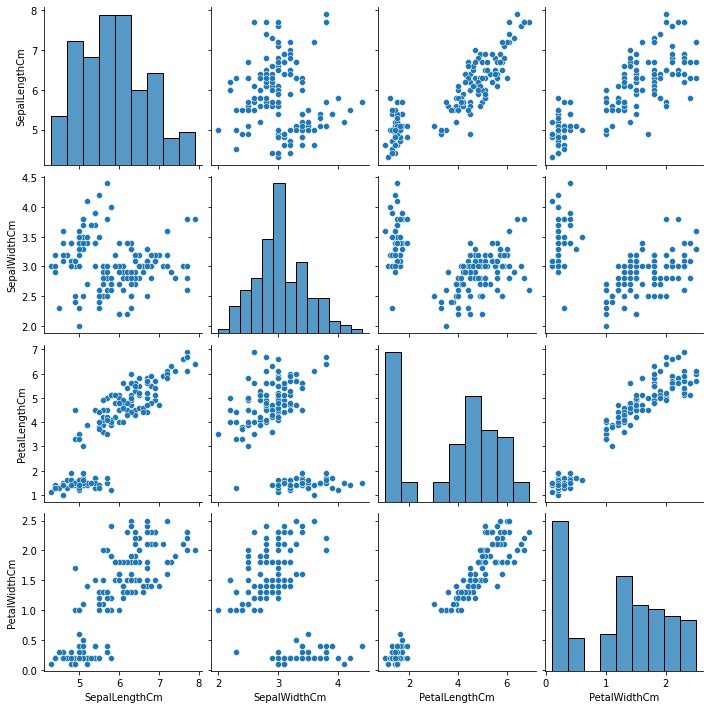

In [5]:
# Visualizing the data
sns.pairplot(data)

From the graphs 2 clusters are clearly visible. However, we do further analysis to be sure.

## Deciding optimim number of clusters

### Elbow Method with KMeans

In [6]:
from sklearn.cluster import KMeans

In [7]:
inertia = []

In [8]:
# Running a loop to get inertia value for different number of clusters
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)


Text(0.5, 0, 'Clusters')

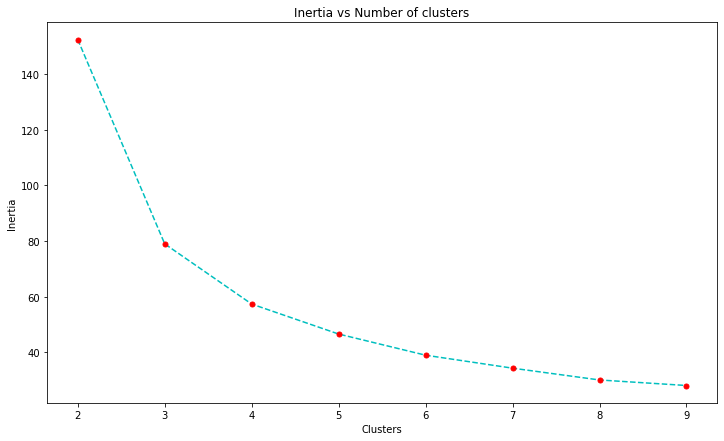

In [9]:
# Plotting the acquired inertia values against the respective number of clusters

plt.figure(figsize = (12,7))
plt.plot(range(2,10), inertia, marker = 'o', markerfacecolor = 'red', markersize=5, markeredgecolor='red', linestyle = '--', color = 'c')
plt.title('Inertia vs Number of clusters')
plt.ylabel('Inertia')
plt.xlabel('Clusters')

 #According to this method 3 clusters seems to be the best option, as the slope sees significant change at 3.

### Silhouette method using KMeans

In [10]:
sil_score = []

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
# Calculating silhoutte score for differnt number of clusters

for k in range(2,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    sil_score.append(silhouette_score(data, kmeans.labels_))

Text(0.5, 0, 'Clusters')

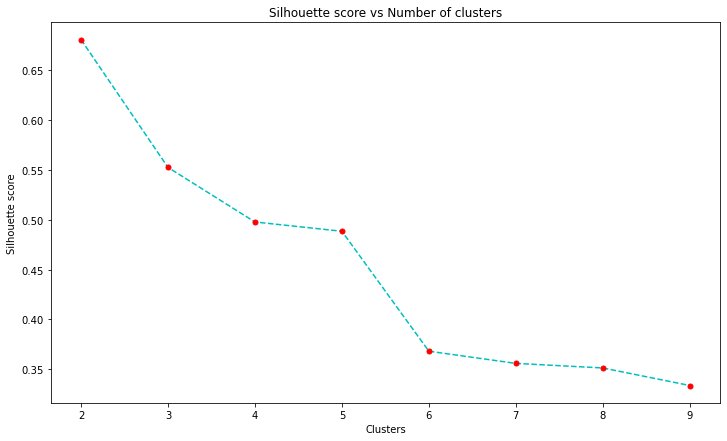

In [13]:
# Plotting silhouette scores against respective number of clusters

plt.figure(figsize = (12,7))
plt.plot(range(2,10), sil_score , marker = 'o', markerfacecolor = 'red', markersize=5, markeredgecolor='red', linestyle = '--', color = 'c')
plt.title('Silhouette score vs Number of clusters')
plt.ylabel('Silhouette score')
plt.xlabel('Clusters')

This shows that 2 is the highest score, so the obvious number of clusters but score for 3 clusters is not far behind.
We'll take the result as 3 because 3 clusters must add some information if not very significant information.

## Hierarchical clustering

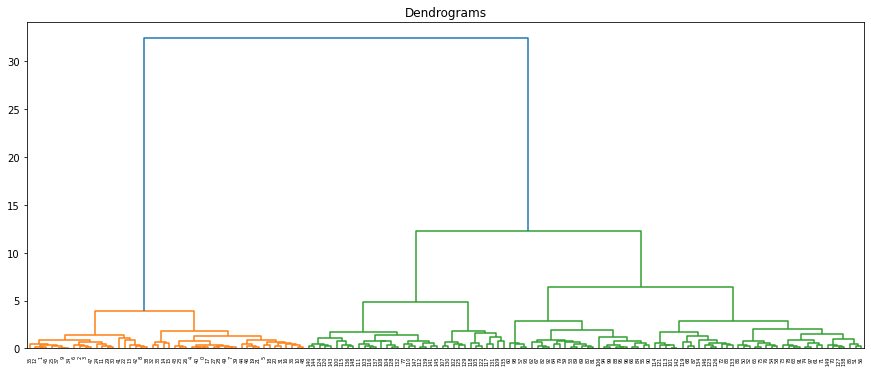

In [14]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 6))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))

This method shows two very distinct clusters of irises but there are two clusters in second cluster though not very different from each other. 

## Results
1. Elbow method : optimum 3 clusters
2. Silhouette coeffitient : optimum 2 clusters but 3 is also a good score
3. Hierarchical clustering : 3 distinguishable clusters, although two of them are pretty similar.

## Conclusion

Best option would be to make 3 clusters as it is a majority in results and can be seen in dendogram clearly even if two are very similar there is still a significant difference.

## Visualization of results

In [15]:
kmeans = KMeans(n_clusters = 3)
predictions = kmeans.fit_predict(data)

In [16]:
pred = pd.DataFrame(predictions, columns = ['Clusters'], index= range(0,150))

In [17]:
new_results = pd.concat([data, pred], axis=1)

In [18]:
new_results.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


Text(0.5, 1.0, 'Predicted Clusters')

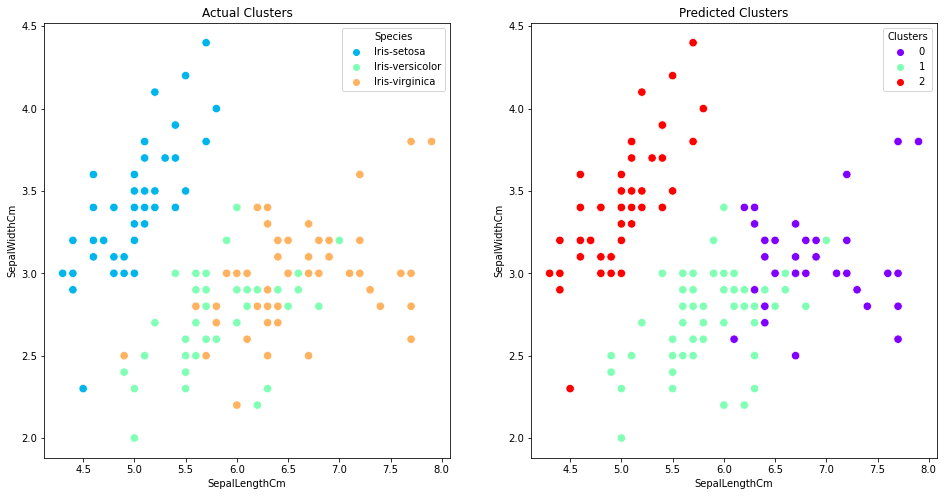

In [19]:
f, axes = plt.subplots(1, 2, figsize=(16,8), sharex=True)
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = iris, hue = 'Species', ax = axes[0], palette='rainbow', s=70)
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = new_results, hue = 'Clusters', ax = axes[1], palette='rainbow', s=70)
axes[0].set_title('Actual Clusters')
axes[1].set_title('Predicted Clusters')

Text(0.5, 1.0, 'Predicted Clusters')

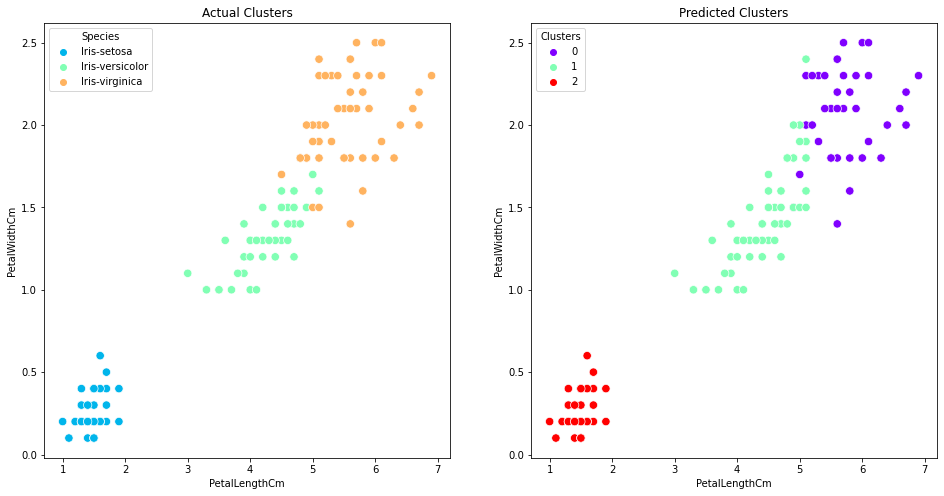

In [20]:
f, axes = plt.subplots(1, 2, figsize=(16,8), sharex=True)
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = iris, hue = 'Species', ax = axes[0], palette='rainbow', s=70)
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = new_results, hue = 'Clusters', ax = axes[1], palette='rainbow', s=70)
axes[0].set_title('Actual Clusters')
axes[1].set_title('Predicted Clusters')

## Thank you.